<a href="https://colab.research.google.com/github/nafis-neehal/ML_PROJ_RPI/blob/main/HW5/HW5_6000/HW_5_6000_RL_TIC_TAC_TOE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import numpy as np
from math import inf as infinity
import itertools
import random
import time

# Stage 1: Training with Q-Learning and Save Policy

## Init Game State and Players

In [2]:
game_state = [[' ',' ',' '],
              [' ',' ',' '],
              [' ',' ',' ']]
players = ['X','O']

## Helper Functions for Training

In [3]:
#play a move in a blank space and make sure the space is blank
def play_move(state, player, block_num):
    if state[int((block_num-1)/3)][(block_num-1)%3] is ' ':
        state[int((block_num-1)/3)][(block_num-1)%3] = player
    else:
        block_num = int(input("Block is not empty! Choose again: "))
        play_move(state, player, block_num)

#make a copy of the current game state as backup   
def copy_game_state(state):
    new_state = [[' ',' ',' '],[' ',' ',' '],[' ',' ',' ']]
    for i in range(3):
        for j in range(3):
            new_state[i][j] = state[i][j]
    return new_state

'''
Check if wins in Horizontal, Vertical and Diagonals.
Also check if game is tie. 
'''
def check_current_state(game_state):    
    # Check horizontals
    if (game_state[0][0] == game_state[0][1] and game_state[0][1] == game_state[0][2] and game_state[0][0] is not ' '):
        return game_state[0][0], "Done"
    if (game_state[1][0] == game_state[1][1] and game_state[1][1] == game_state[1][2] and game_state[1][0] is not ' '):
        return game_state[1][0], "Done"
    if (game_state[2][0] == game_state[2][1] and game_state[2][1] == game_state[2][2] and game_state[2][0] is not ' '):
        return game_state[2][0], "Done"
    
    # Check verticals
    if (game_state[0][0] == game_state[1][0] and game_state[1][0] == game_state[2][0] and game_state[0][0] is not ' '):
        return game_state[0][0], "Done"
    if (game_state[0][1] == game_state[1][1] and game_state[1][1] == game_state[2][1] and game_state[0][1] is not ' '):
        return game_state[0][1], "Done"
    if (game_state[0][2] == game_state[1][2] and game_state[1][2] == game_state[2][2] and game_state[0][2] is not ' '):
        return game_state[0][2], "Done"
    
    # Check diagonals
    if (game_state[0][0] == game_state[1][1] and game_state[1][1] == game_state[2][2] and game_state[0][0] is not ' '):
        return game_state[1][1], "Done"
    if (game_state[2][0] == game_state[1][1] and game_state[1][1] == game_state[0][2] and game_state[2][0] is not ' '):
        return game_state[1][1], "Done"
    
    # Check if draw
    draw_flag = 0
    for i in range(3):
        for j in range(3):
            if game_state[i][j] is ' ':
                draw_flag = 1
    if draw_flag is 0:
        return None, "Draw"
    
    return None, "Not Done"

#print board
def print_board(game_state):
    print('----------------')
    print('| ' + str(game_state[0][0]) + ' || ' + str(game_state[0][1]) + ' || ' + str(game_state[0][2]) + ' |')
    print('----------------')
    print('| ' + str(game_state[1][0]) + ' || ' + str(game_state[1][1]) + ' || ' + str(game_state[1][2]) + ' |')
    print('----------------')
    print('| ' + str(game_state[2][0]) + ' || ' + str(game_state[2][1]) + ' || ' + str(game_state[2][2]) + ' |')
    print('----------------')

#Update state value of player 'O'
def update_state_value_O(curr_state_idx, next_state_idx, learning_rate):
    new_value = state_values_for_AI_O[curr_state_idx] + learning_rate*(state_values_for_AI_O[next_state_idx]  - state_values_for_AI_O[curr_state_idx])
    state_values_for_AI_O[curr_state_idx] = new_value

#Update state value of player 'X'    
def update_state_value_X(curr_state_idx, next_state_idx, learning_rate):
    new_value = state_values_for_AI_X[curr_state_idx] + learning_rate*(state_values_for_AI_X[next_state_idx]  - state_values_for_AI_X[curr_state_idx])
    state_values_for_AI_X[curr_state_idx] = new_value

#Agent learns to choose best move using Q-Learning
def getBestMove(state, player, epsilon):
    '''
    Reinforcement Q-Learning Algorithm
    '''    
    moves = []
    curr_state_values = []
    empty_cells = []
    for i in range(3):
        for j in range(3):
            if state[i][j] is ' ':
                empty_cells.append(i*3 + (j+1))
    
    for empty_cell in empty_cells:
        moves.append(empty_cell)
        new_state = copy_game_state(state)
        play_move(new_state, player, empty_cell)
        next_state_idx = list(states_dict.keys())[list(states_dict.values()).index(new_state)]
        if player == 'X':
            curr_state_values.append(state_values_for_AI_X[next_state_idx])
        else:
            curr_state_values.append(state_values_for_AI_O[next_state_idx])
        
    print('Possible moves = ' + str(moves))
    print('Move values = ' + str(curr_state_values))    
    best_move_idx = np.argmax(curr_state_values)
    
    if np.random.uniform(0,1) <= epsilon:       # Exploration
        best_move = random.choice(empty_cells)
        print('Agent decides to explore! Takes action = ' + str(best_move))
        epsilon *= 0.99
    else:   #Exploitation
        best_move = moves[best_move_idx]
        print('Agent decides to exploit! Takes action = ' + str(best_move))
    return best_move


## Initialize Training Params

In [4]:
# Initialize state values
player = ['X','O',' ']
states_dict = {}
all_possible_states = [[list(i[0:3]),list(i[3:6]),list(i[6:10])] for i in itertools.product(player, repeat = 9)]
n_states = len(all_possible_states) # 2 players, 9 spaces
n_actions = 9   # 9 spaces
state_values_for_AI_O = np.full((n_states),0.0)
state_values_for_AI_X = np.full((n_states),0.0)
print("n_states = %i \nn_actions = %i"%(n_states, n_actions))

# State values for AI 'O'
for i in range(n_states):
    states_dict[i] = all_possible_states[i]
    winner, _ = check_current_state(states_dict[i])
    if winner == 'O':   # AI won
        state_values_for_AI_O[i] = 1
    elif winner == 'X':   # AI lost
        state_values_for_AI_O[i] = -1
        
# State values for AI 'X'       
for i in range(n_states):
    winner, _ = check_current_state(states_dict[i])
    if winner == 'O':   # AI lost
        state_values_for_AI_X[i] = -1
    elif winner == 'X':   # AI won
        state_values_for_AI_X[i] = 1

n_states = 19683 
n_actions = 9


## Begin Training with Q-Learning

In [6]:
# PLaying

#LOAD PRE-TRAINED STATE VALUES FROM FIRST RUN - for faster training
state_values_for_AI_X = np.loadtxt('./tic-tac-toe-bot/trained_state_values_X.txt', dtype=np.float64)
state_values_for_AI_O = np.loadtxt('./tic-tac-toe-bot/trained_state_values_O.txt', dtype=np.float64)

#Winning History Record
dict_hist = {'O':0, 'X':0, 'D':0}

learning_rate = 0.2
epsilon = 0.2
num_iterations = 10000
for iteration in range(num_iterations):
    game_state = [[' ',' ',' '],
              [' ',' ',' '],
              [' ',' ',' ']]
    current_state = "Not Done"
    print("\nIteration " + str(iteration) + "!")
    print_board(game_state)
    winner = None
    current_player_idx = random.choice([0,1])
        
    while current_state == "Not Done":
        curr_state_idx = list(states_dict.keys())[list(states_dict.values()).index(game_state)]
        if current_player_idx == 0:     # AI_X's turn
            print("\nAI X's turn!")         
            block_choice = getBestMove(game_state, players[current_player_idx], epsilon)
            play_move(game_state ,players[current_player_idx], block_choice)
            new_state_idx = list(states_dict.keys())[list(states_dict.values()).index(game_state)]
            
        else:       # AI_O's turn
            print("\nAI O's turn!")   
            block_choice = getBestMove(game_state, players[current_player_idx], epsilon)
            play_move(game_state ,players[current_player_idx], block_choice)
            new_state_idx = list(states_dict.keys())[list(states_dict.values()).index(game_state)]
        
        print_board(game_state)
        #print('State value = ' + str(state_values_for_AI[new_state_idx]))
        update_state_value_O(curr_state_idx, new_state_idx, learning_rate)
        update_state_value_X(curr_state_idx, new_state_idx, learning_rate)
        winner, current_state = check_current_state(game_state)
        if winner is not None:
            print(str(winner) + " won!")
            dict_hist[str(winner)] +=1
        else:
            current_player_idx = (current_player_idx + 1)%2
        
        if current_state is "Draw":
            print("Draw!")
            dict_hist['D'] +=1
            
        #time.sleep(1)
    print(dict_hist)
print('Training Complete!')    

# Save state values for future use
np.savetxt('trained_state_values_X.txt', state_values_for_AI_X, fmt = '%.6f')
np.savetxt('trained_state_values_O.txt', state_values_for_AI_O, fmt = '%.6f')

Streaming output truncated to the last 5000 lines.
AI O's turn!
Possible moves = [6, 7]
Move values = [0.0, -0.9981997419204449]
Agent decides to exploit! Takes action = 6
----------------
| O || X || O |
----------------
| X || X || O |
----------------
|   || O || X |
----------------

AI X's turn!
Possible moves = [7]
Move values = [0.0]
Agent decides to exploit! Takes action = 7
----------------
| O || X || O |
----------------
| X || X || O |
----------------
| X || O || X |
----------------
Draw!
{'O': 2675, 'X': 2740, 'D': 4531}

Iteration 9946!
----------------
|   ||   ||   |
----------------
|   ||   ||   |
----------------
|   ||   ||   |
----------------

AI X's turn!
Possible moves = [1, 2, 3, 4, 5, 6, 7, 8, 9]
Move values = [-0.14075117053626596, -0.386634478946084, -0.26550791769526805, -0.2095928154373134, 0.21234501853552618, -0.2631313534114958, -0.32898302096167686, -0.19057174558777062, -0.14711597417944094]
Agent decides to explore! Takes action = 2
---------------

## Training Evaluation

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
dict_hist

{'D': 4543, 'O': 2701, 'X': 2756}

I used a very simple visual/qualitative evaluation technique. During the training, there were in total 4.5k Draws and almost equal amount of wins for each of the player which shows both of them has been trained on equally well performance. As you can see from the following plot, both player 'X' and 'O' has almost same amount of wins against each other and a significant number of draw games.

<BarContainer object of 3 artists>

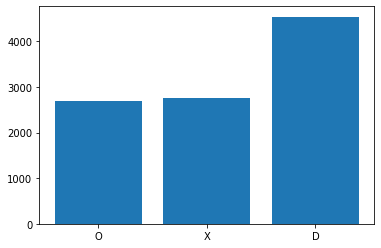

In [16]:
keys = dict_hist.keys()
values = dict_hist.values()
plt.bar(keys, values)

# Stage 2: Playing with Humans

## Init State for Testing against humans

In [3]:
game_state = [[' ',' ',' '],
              [' ',' ',' '],
              [' ',' ',' ']]
players = ['X','O']

In [4]:
def play_move(state, player, block_num):
    if state[int((block_num-1)/3)][(block_num-1)%3] is ' ':
        state[int((block_num-1)/3)][(block_num-1)%3] = player
    else:
        block_num = int(input("Block is not empty, ya blockhead! Choose again: "))
        play_move(state, player, block_num)
    
def copy_game_state(state):
    new_state = [[' ',' ',' '],[' ',' ',' '],[' ',' ',' ']]
    for i in range(3):
        for j in range(3):
            new_state[i][j] = state[i][j]
    return new_state
    
def check_current_state(game_state):    
    # Check horizontals
    if (game_state[0][0] == game_state[0][1] and game_state[0][1] == game_state[0][2] and game_state[0][0] is not ' '):
        return game_state[0][0], "Done"
    if (game_state[1][0] == game_state[1][1] and game_state[1][1] == game_state[1][2] and game_state[1][0] is not ' '):
        return game_state[1][0], "Done"
    if (game_state[2][0] == game_state[2][1] and game_state[2][1] == game_state[2][2] and game_state[2][0] is not ' '):
        return game_state[2][0], "Done"
    
    # Check verticals
    if (game_state[0][0] == game_state[1][0] and game_state[1][0] == game_state[2][0] and game_state[0][0] is not ' '):
        return game_state[0][0], "Done"
    if (game_state[0][1] == game_state[1][1] and game_state[1][1] == game_state[2][1] and game_state[0][1] is not ' '):
        return game_state[0][1], "Done"
    if (game_state[0][2] == game_state[1][2] and game_state[1][2] == game_state[2][2] and game_state[0][2] is not ' '):
        return game_state[0][2], "Done"
    
    # Check diagonals
    if (game_state[0][0] == game_state[1][1] and game_state[1][1] == game_state[2][2] and game_state[0][0] is not ' '):
        return game_state[1][1], "Done"
    if (game_state[2][0] == game_state[1][1] and game_state[1][1] == game_state[0][2] and game_state[2][0] is not ' '):
        return game_state[1][1], "Done"
    
    # Check if draw
    draw_flag = 0
    for i in range(3):
        for j in range(3):
            if game_state[i][j] is ' ':
                draw_flag = 1
    if draw_flag is 0:
        return None, "Draw"
    
    return None, "Not Done"

def print_board(game_state):
    print('----------------')
    print('| ' + str(game_state[0][0]) + ' || ' + str(game_state[0][1]) + ' || ' + str(game_state[0][2]) + ' |')
    print('----------------')
    print('| ' + str(game_state[1][0]) + ' || ' + str(game_state[1][1]) + ' || ' + str(game_state[1][2]) + ' |')
    print('----------------')
    print('| ' + str(game_state[2][0]) + ' || ' + str(game_state[2][1]) + ' || ' + str(game_state[2][2]) + ' |')
    print('----------------')

In [5]:
player = ['X','O',' ']
states_dict = {}
all_possible_states = [[list(i[0:3]),list(i[3:6]),list(i[6:10])] for i in itertools.product(player, repeat = 9)]
n_states = len(all_possible_states) # 2 players, 9 spaces
n_actions = 9   # 9 spaces
state_values_for_AI = np.full((n_states),0.0)
print("n_states = %i \nn_actions = %i"%(n_states, n_actions))

n_states = 19683 
n_actions = 9


In [6]:
for i in range(n_states):
    states_dict[i] = all_possible_states[i]
    winner, _ = check_current_state(states_dict[i])
    if winner == 'O':   # AI won
        state_values_for_AI[i] = 1
    elif winner == 'X':   # AI lost
        state_values_for_AI[i] = -1

## Choose next move based on saved policy during training using Q-Learning

In [7]:
def update_state_value(curr_state_idx, next_state_idx, learning_rate):
    new_value = state_values_for_AI[curr_state_idx] + learning_rate*(state_values_for_AI[next_state_idx]  - state_values_for_AI[curr_state_idx])
    state_values_for_AI[curr_state_idx] = new_value

In [8]:
def getBestMove(state, player):  
    moves = []
    curr_state_values = []
    empty_cells = []
    for i in range(3):
        for j in range(3):
            if state[i][j] is ' ':
                empty_cells.append(i*3 + (j+1))
    
    for empty_cell in empty_cells:
        moves.append(empty_cell)
        new_state = copy_game_state(state)
        play_move(new_state, player, empty_cell)
        next_state_idx = list(states_dict.keys())[list(states_dict.values()).index(new_state)]
        curr_state_values.append(state_values_for_AI[next_state_idx])
        
    print('Possible moves = ' + str(moves))
    print('Move values = ' + str(curr_state_values))    
    best_move_idx = np.argmax(curr_state_values)
    best_move = moves[best_move_idx]
    return best_move

## Play

In [10]:
# PLaying
    
#LOAD TRAINED STATE VALUES
state_values_for_AI = np.loadtxt('./tic-tac-toe-bot/trained_state_values_O.txt', dtype=np.float64)
dict_state_test = {'Human':0, 'AI':0, 'Draw':0}
play_again = 'Y'
while play_again == 'Y' or play_again == 'y':
    game_state = [[' ',' ',' '],
              [' ',' ',' '],
              [' ',' ',' ']]
    current_state = "Not Done"
    print("\nNew Game!")
    print_board(game_state)
    player_choice = input("Choose which player goes first - X (human) or O(The mighty AI): ")
    winner = None
    
    if player_choice == 'X' or player_choice == 'x':
        current_player_idx = 0
    else:
        current_player_idx = 1
        
    while current_state == "Not Done":
        curr_state_idx = list(states_dict.keys())[list(states_dict.values()).index(game_state)]
        if current_player_idx == 0: # Human's turn
            block_choice = int(input("Oye Human, your turn! Choose where to place (1 to 9): "))
            play_move(game_state ,players[current_player_idx], block_choice)
            
        else:   # AI's turn
            block_choice = getBestMove(game_state, players[current_player_idx])
            play_move(game_state ,players[current_player_idx], block_choice)
            print("AI plays move: " + str(block_choice))
        
        print_board(game_state)
        winner, current_state = check_current_state(game_state)
        if winner is not None:
          if (str(winner)=='O'):
            print("AI won!")
            dict_state_test['AI'] +=1
            print(dict_state_test)
          elif (str(winner)=='X'):
            print("Human won!")
            dict_state_test['Human'] +=1
            print(dict_state_test)
        else:
            current_player_idx = (current_player_idx + 1)%2
        
        if current_state is "Draw":
            print("Draw!")
            dict_state_test['Draw'] +=1
            print(dict_state_test)
            
    play_again = input('Wanna try again?(Y/N) : ')
print('Good Game!')
print(f'Final Stat: {dict_state_test}')


New Game!
----------------
|   ||   ||   |
----------------
|   ||   ||   |
----------------
|   ||   ||   |
----------------
Choose which player goes first - X (human) or O(The mighty AI): X
Oye Human, your turn! Choose where to place (1 to 9): 1
----------------
| X ||   ||   |
----------------
|   ||   ||   |
----------------
|   ||   ||   |
----------------
Possible moves = [2, 3, 4, 5, 6, 7, 8, 9]
Move values = [-0.175858, 0.01031, -0.051866, 0.250661, -0.008078, 0.013969, -0.002939, -0.00299]
AI plays move: 5
----------------
| X ||   ||   |
----------------
|   || O ||   |
----------------
|   ||   ||   |
----------------
Oye Human, your turn! Choose where to place (1 to 9): 3
----------------
| X ||   || X |
----------------
|   || O ||   |
----------------
|   ||   ||   |
----------------
Possible moves = [2, 4, 6, 7, 8, 9]
Move values = [0.16, 0.8524, 0.696045, 0.052938, 0.12, -0.137713]
AI plays move: 4
----------------
| X ||   || X |
----------------
| O || O ||   |
-----